In [1]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

c:\python 3.7\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
c:\python 3.7\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


16000


ValueError: x and y must have same first dimension, but have shapes (16000,) and (31677,)

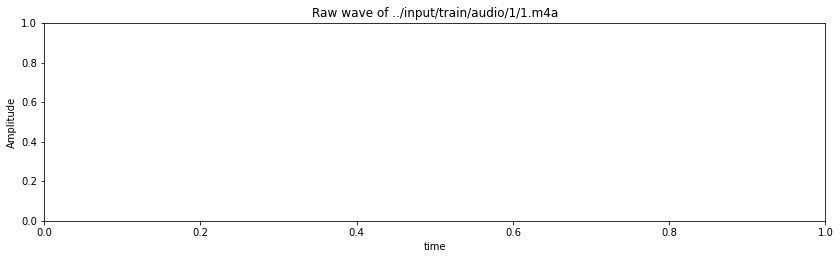

In [13]:

train_audio_path = 'D:/DATA/voice/train/audio/'
samples, sample_rate = librosa.load(train_audio_path+'1/1.wav', sr = 16000)
print(sample_rate)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/1/1.m4a')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [14]:
ipd.Audio(samples, rate=sample_rate)
print(sample_rate)

16000


In [15]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples[], rate=8000)

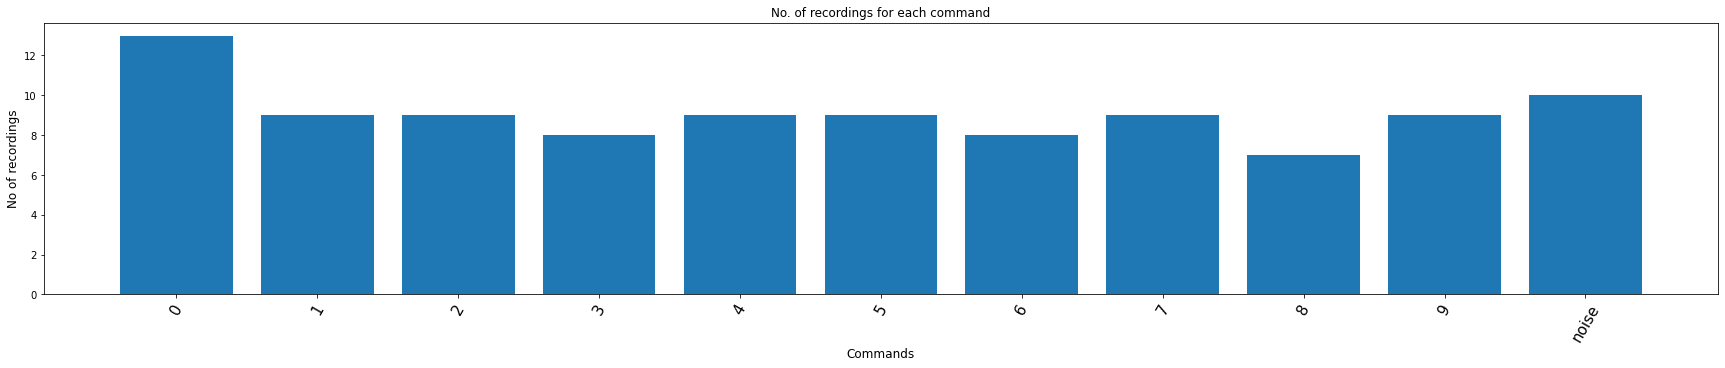

In [23]:
labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

labels=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9","noise"]

In [24]:
labels

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'noise']

(array([97.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 1.4899375 ,  7.45649375, 13.42305   , 19.38960625, 25.3561625 ,
        31.32271875, 37.289275  , 43.25583125, 49.2223875 , 55.18894375,
        61.1555    ]),
 <a list of 10 Patch objects>)

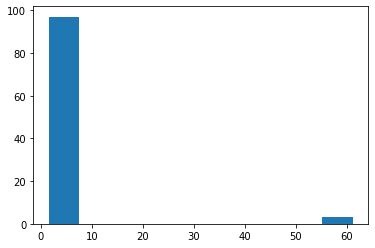

In [25]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [1]:
train_audio_path = 'D:/DATA/voice/train/audio/'

all_wave = []
all_label = []
all_chroma = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
#         samples = librosa.resample(samples, sample_rate, 16000)
        
        leng = len(samples)
        
        samples = samples[leng-23000:leng-1000]#
        chroma = librosa.feature.chroma_stft(y=samples, sr=16000)
#         print((chroma.shape))
#         if len(samples) ==22000:
        all_wave.append(samples)
        all_chroma.append(chroma)
        all_label.append(label)


NameError: name 'labels' is not defined

In [248]:
all_chroma = np.array(all_chroma)
print(all_chroma.shape)

(100, 12, 43)


8


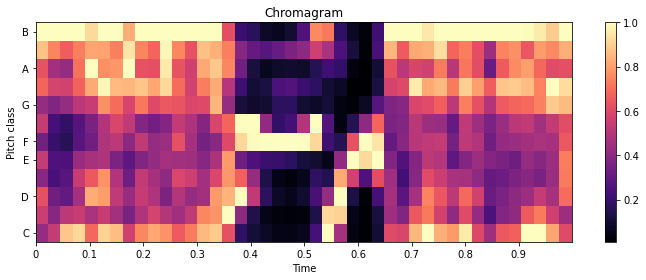

In [250]:
import matplotlib.pyplot as plt
import librosa.display

testID = 75
print(all_label[testID])
chroma = all_chroma[testID]

plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()


In [193]:
ipd.Audio(all_wave[75], rate=16000)

In [251]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)


In [252]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))
all_chroma = np.array(all_chroma).reshape(-1,12,43)

In [253]:
all_chroma.shape

(100, 12, 43)

In [254]:
all_chroma.shape


(100, 12, 43)

In [255]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_chroma),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [256]:
x_tr.shape

(80, 12, 43)

In [229]:
# from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
# from keras.models import Model
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras import backend as K
# K.clear_session()

# inputs = Input(shape=(12,43,1))

# #First Conv1D layer
# conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
# conv = MaxPooling1D(3)(conv)
# conv = Dropout(0.3)(conv)

# #Second Conv1D layer
# conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
# conv = MaxPooling1D(3)(conv)
# conv = Dropout(0.3)(conv)

# #Third Conv1D layer
# conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
# conv = MaxPooling1D(3)(conv)
# conv = Dropout(0.3)(conv)

# #Fourth Conv1D layer
# conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
# conv = MaxPooling1D(3)(conv)
# conv = Dropout(0.3)(conv)

# #Flatten layer
# conv = Flatten()(conv)

# #Dense Layer 1
# conv = Dense(256, activation='relu')(conv)
# conv = Dropout(0.3)(conv)

# #Dense Layer 2
# conv = Dense(128, activation='relu')(conv)
# conv = Dropout(0.3)(conv)

# outputs = Dense(len(labels), activation='softmax')(conv)

# model = Model(inputs, outputs)
# model.summary()

In [262]:
from keras.models import Model, Sequential
from keras.layers import *
from keras.activations import *
from keras.optimizers import Adam,RMSprop,SGD
model1 = Sequential()

# model1.add(Conv2D(8, kernel_size=(5, 5), strides= (2, 2), padding='same',input_shape=( 12, 43)))
# model1.add(LeakyReLU(alpha=0.1))
# model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(16, kernel_size=(3, 3), strides= (1, 1), padding='same',input_shape=( 12, 43,1)))
model1.add(LeakyReLU(alpha=0.1))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, kernel_size=(3, 3), strides= (1, 1), padding='same'))
model1.add(LeakyReLU(alpha=0.1))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dropout(0.3))
model1.add(Dense(2))
model1.add(Activation('sigmoid'))
optimizer = Adam(lr=0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer)
model1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 12, 43, 16)        160       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 12, 43, 16)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 21, 16)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 6, 21, 32)         4640      
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 6, 21, 32)         0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 3, 10, 32)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 960)             

In [263]:
# model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
def generator(x, y, batch_size):
    samples = x.shape[0]
    steps = samples/batch_size
    counter =0
    while True:
        batch_x = np.array(x[batch_size*counter: batch_size*(counter+1)]).astype(np.float32)
        batch_x = batch_x/255.0
        batch_y = np.array(y[batch_size*counter: batch_size*(counter+1)]).astype(np.float32)
        counter+=1
        yield batch_x, batch_y
        if counter >= steps:
            counter = 0

In [264]:
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
# mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
batch_size = 8
epochs=50
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("models/sign.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
history= model.fit_generator(generator(x_tr, y_tr, batch_size), epochs=epochs, steps_per_epoch = x_tr.shape[0]/batch_size, 
                             validation_data=generator(x_val, y_val, batch_size), validation_steps = x_val.shape[0]/batch_size, callbacks=[checkpoint])

Epoch 1/50


ValueError: Error when checking input: expected input_1 to have shape (516, 1) but got array with shape (12, 43)

In [244]:
x_tr.shape

(80, 12, 43, 1)

In [235]:
history=model1.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=8, validation_data=(x_val,y_val))

ValueError: Error when checking target: expected activation_3 to have shape (2,) but got array with shape (11,)